In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List,Dict
import os
import json
import statistics
from transformers import AutoTokenizer
from util_statistics import wizard_files,snoozy_files,gpt_files,mistral_file,\
                    mistral_file_test_only, gpt_file_test_only,\
                    OS_PATH_MG_DATA_WIZARD_SNOOZY_MISTRAL_GPT, \
                    OS_PATH_MG_DATA_WIZARD_GPT_TEST_ONLY, \
                    FILENAME_TOKENLENGTH_DICT_MG_MIXED, \
                    FILENAME_TOKENLENGTH_DICT_MG_TEST_ONLY, \
                    OS_PATH_STATISTICS_OUTPUT

NUM_GENRES = 5

In [2]:
# just take bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [3]:
def get_token_len_dict(list_of_files: List[str], PATH: str) -> Dict[str, Dict[str, int]]:
    token_lens_dict = {}
    for file_name in list_of_files:
        input_path = os.path.join(
            PATH,
            file_name
        )

        key = f"token_lens_{file_name}"
        token_lens = {}
        token_lens_dict[key] = token_lens

        encoding='utf-8'

        with open(input_path, 'r',encoding=encoding) as input:
            for i, line in enumerate(input, start=1):
                columns = line.strip().split('\t')
                text = columns[0]
                if len(text) <10:
                    print(i)               
                
                tokens = tokenizer.tokenize(text.strip())
                token_count = len(tokens)
                token_lens[i] = token_count

        token_lens_dict[key] = token_lens
        print("\nSuccessfully extracted ", key ," from ", input_path)
    print("\nSuccessfully extracted all length from ", PATH)
    return token_lens_dict

In [4]:
machine_generated_files_mixed = wizard_files+snoozy_files+gpt_files+mistral_file
token_lens_dict_mg_mixed = {}
token_lens_dict_mg_mixed = get_token_len_dict(machine_generated_files_mixed, 
                                        OS_PATH_MG_DATA_WIZARD_SNOOZY_MISTRAL_GPT,
                                        )
machine_generated_files_test_only = mistral_file_test_only + gpt_file_test_only
token_lens_dict_mg_test_only = {}
token_lens_dict_mg_test_only = get_token_len_dict(machine_generated_files_test_only, 
                                        OS_PATH_MG_DATA_WIZARD_GPT_TEST_ONLY,
                                        )

1

Successfully extracted  token_lens_wizard_generated_springernature.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/wizard_generated_springernature.tsv
1
2


Token indices sequence length is longer than the specified maximum sequence length for this model (672 > 512). Running this sequence through the model will result in indexing errors



Successfully extracted  token_lens_wizard_generated_taz.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/wizard_generated_taz.tsv
1

Successfully extracted  token_lens_wizard_generated_wikipedia.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/wizard_generated_wikipedia.tsv
1

Successfully extracted  token_lens_wizard_generated_zeitonline.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/wizard_generated_zeitonline.tsv

Successfully extracted  token_lens_snoozy_generated_springernature.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/snoozy_generated_springernature.tsv

Successfully extracted  token_lens_snoozy_generated_taz.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/snoozy_generated_taz.tsv

Successfully extracted  token_lens_snoozy_generated_wikipedia.tsv  from  /home/verena/master_thesis/data/h_traindata_machine_generated/snoozy_generated_wikipedia.tsv
1033
1

In [5]:
token_lens_dict_mg_mixed
token_lens_dict_mg_test_only
for key,values in token_lens_dict_mg_test_only.items():
    print(len(values))


471
801


In [6]:

def save_dicts_tokenlength(out_path_name: str, out_file_name: str, data: Dict[str, Dict[str, int]])-> None:
    # File path to save the JSON file
    out_path_obj= os.path.join(
        out_path_name,
        out_file_name
    )
    # Save the dictionary as a JSON file
    with open(out_path_obj, "w") as out_file_obj:
        json.dump(data, out_file_obj, indent=4)

    return None

In [7]:
save_dicts_tokenlength(OS_PATH_STATISTICS_OUTPUT,
                       FILENAME_TOKENLENGTH_DICT_MG_MIXED,
                       token_lens_dict_mg_mixed
                       )
save_dicts_tokenlength(OS_PATH_STATISTICS_OUTPUT,
                       FILENAME_TOKENLENGTH_DICT_MG_TEST_ONLY,
                       token_lens_dict_mg_test_only
                       )

In [3]:
# load jsons
mg_path_object = os.path.join(
    OS_PATH_STATISTICS_OUTPUT,
    FILENAME_TOKENLENGTH_DICT_MG_MIXED
)
with open(mg_path_object, 'r') as mg_file:
    token_lens_dict_mg_mixed = json.load(mg_file)

In [52]:
token_lens_dict_mg_mixed

{'token_lens_output_springernature.jsonl': {'1': 185,
  '2': 309,
  '3': 375,
  '4': 128,
  '5': 258,
  '6': 90,
  '7': 123,
  '8': 220,
  '9': 148,
  '10': 100,
  '11': 348,
  '12': 258,
  '13': 270,
  '14': 226,
  '15': 389,
  '16': 247,
  '17': 224,
  '18': 188,
  '19': 341,
  '20': 410,
  '21': 251,
  '22': 274,
  '23': 775,
  '24': 227,
  '25': 275,
  '26': 191,
  '27': 126,
  '28': 127,
  '29': 236,
  '30': 180,
  '31': 353,
  '32': 71,
  '33': 142,
  '34': 378,
  '35': 45,
  '36': 260,
  '37': 469,
  '38': 315,
  '39': 254,
  '40': 91,
  '41': 223,
  '42': 180,
  '43': 243,
  '44': 191,
  '45': 95,
  '46': 211,
  '47': 100,
  '48': 112,
  '49': 533,
  '50': 310,
  '51': 188,
  '52': 221,
  '53': 180,
  '54': 249,
  '55': 380,
  '56': 105,
  '57': 131,
  '58': 293,
  '59': 166,
  '60': 436,
  '61': 187,
  '62': 234,
  '63': 184,
  '64': 181,
  '65': 556,
  '66': 285,
  '67': 185,
  '68': 271,
  '69': 78,
  '70': 520,
  '71': 308,
  '72': 552,
  '73': 381,
  '74': 341,
  '75': 92,

In [8]:
def plot_data(token_lens_dict, model_signifier: str, class_string = None):
    # Create a list of colors for each list
    colors = sns.color_palette("husl", 4)
    labels = ["Springer-Nature","TAZ","Wikipedia","Zeit-Online"]
    if "mistral" in model_signifier:
        labels = ["TAZ"]
    if model_signifier == "test":
        labels = ["Wikimedia (GPT)","Wikipedia (Mistral)"]
        model_signifier = ""
    #print("Colors: ",colors)

    new_dict_with_lists = {}
    for i, (filename_key, key_value_dict) in enumerate(token_lens_dict.items()):
        if model_signifier in filename_key:
            ## count all values without their keys to a list
            values = []
            for _key,value in key_value_dict.items():
                values += [value]
            new_dict_with_lists[filename_key] = values

    plt.figure(figsize=(10, 6)) 
    for i, (key, values) in enumerate(new_dict_with_lists.items()):


        # Ensure values are lists
        if not isinstance(values, list):
            values = [values]

        # Convert text lengths to integers
        token_lens_int = [int(token_len) for token_len in values]

        # Calculate quartiles
        token_len_quartiles = np.percentile(token_lens_int, [25, 50, 75])
        print("model:", model_signifier)
        print("The quartile values for", filename_key,": ", token_len_quartiles)
        print(f"The standard deviation for {labels[i]} is: ", statistics.stdev(token_lens_int))
        print("The number of samples: ", len(token_lens_int))
        # Create KDE plot using seaborn
        
        sns.kdeplot(token_lens_int, fill=True, label=f'{labels[i]} Curve', color=colors[i],bw_adjust=1)

        # Add vertical lines for quartiles
        for quartile in token_len_quartiles:
            plt.axvline(quartile, color=colors[i], linestyle='--', linewidth=2, label=f'{labels[i]} Q{np.percentile(values, [25, 50, 75]).tolist().index(quartile) + 1}')

    # Stretching the x-axis
    plt.xlim(0, 1000) 

    # Add labels and title
    plt.xlabel('Token Length')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {class_string} Generated Tokens per Genre')

    # Show legend
    plt.legend()

    plt.savefig(f'kdeplot_{model_signifier}.png')
    # Show the plot
    #plt.show()


    # Plotting box plots
    fig, ax = plt.subplots()
    box = sns.boxplot(data=list(new_dict_with_lists.values()), showfliers=False, palette=colors)

    # Adding quartiles
    for i, (label, values) in enumerate(new_dict_with_lists.items()):
        quartiles = [25, 50, 75]
        quartile_values = [round(np.percentile(values, q), 2) for q in quartiles]
        color = colors[i]
        for q, val in zip(quartiles, quartile_values):
            ax.text(i, val, f'Q{q}', ha='center', va='bottom', color=color)

    # Customize the plot as needed
    ax.set_xticklabels(labels)#new_dict_with_lists.keys())
    ax.set_ylabel('Token Length')
    ax.set_title(f'Distribution of {class_string} Generated Tokens per Genre with Quartiles')

    plt.savefig(f'boxplot_{model_signifier}.png')
    # Show the plot
    #plt.show()

model: snoozy
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 66. 104. 155.]
The standard deviation for Springer-Nature is:  73.0250616194123
The number of samples:  1095
model: snoozy
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 60.  81. 103.]
The standard deviation for TAZ is:  37.341903420314424
The number of samples:  4625
model: snoozy
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 57.   89.  141.5]
The standard deviation for Wikipedia is:  158.49819282627436
The number of samples:  835
model: snoozy
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [36. 52. 77.]
The standard deviation for Zeit-Online is:  36.182536843120616
The number of samples:  1407


/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categoric

model: gpt
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 76.  97. 128.]
The standard deviation for Springer-Nature is:  44.342728897952966
The number of samples:  801
model: gpt
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 58.25  81.   102.  ]
The standard deviation for TAZ is:  35.17403098198511
The number of samples:  1590
model: gpt
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 38.  64. 122.]
The standard deviation for Wikipedia is:  80.20865009422349
The number of samples:  801
model: gpt
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [47. 69. 91.]
The standard deviation for Zeit-Online is:  34.23008887905983
The number of samples:  800


/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categoric

model: wizard
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 71.  96. 125.]
The standard deviation for Springer-Nature is:  44.09725396842415
The number of samples:  1141
model: wizard
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 59.   81.  102.5]
The standard deviation for TAZ is:  35.010707752854486
The number of samples:  2007
model: wizard
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 38.  75. 131.]
The standard deviation for Wikipedia is:  99.17858420084119
The number of samples:  2105
model: wizard
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [47. 70. 97.]
The standard deviation for Zeit-Online is:  39.99474740954329
The number of samples:  2425


/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/verena/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categoric

model: mistral
The quartile values for token_lens_mistral_leo_generated_taz.tsv :  [ 59.  81. 103.]
The standard deviation for TAZ is:  38.25985046247036
The number of samples:  1321


/tmp/ipykernel_2178574/1223130370.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)#new_dict_with_lists.keys())


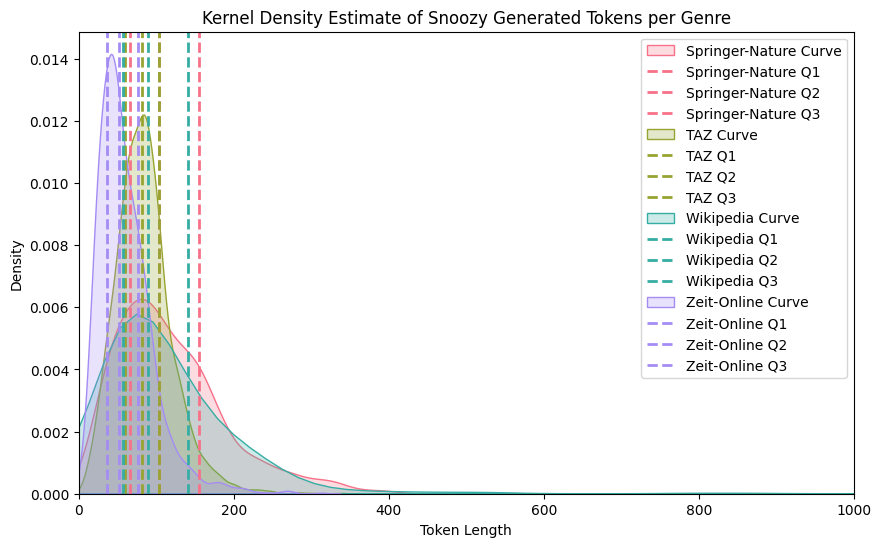

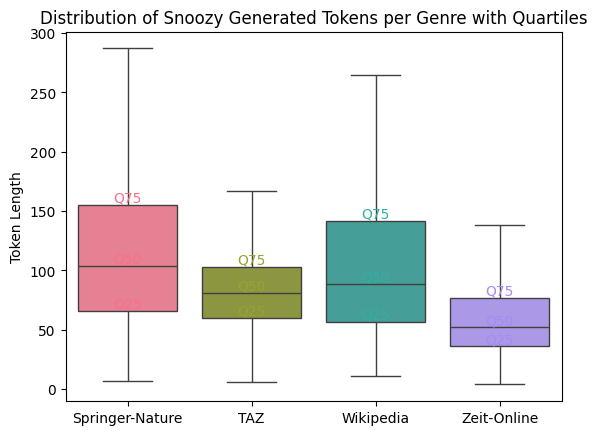

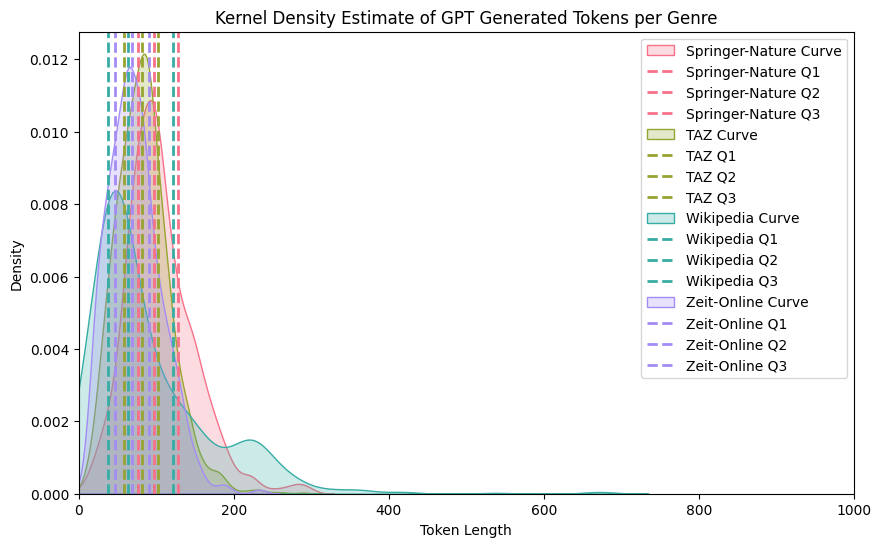

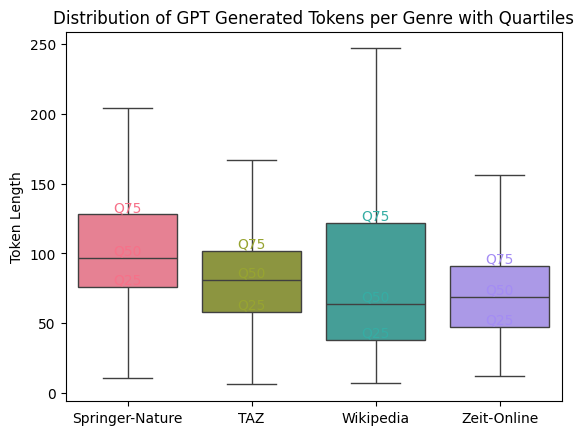

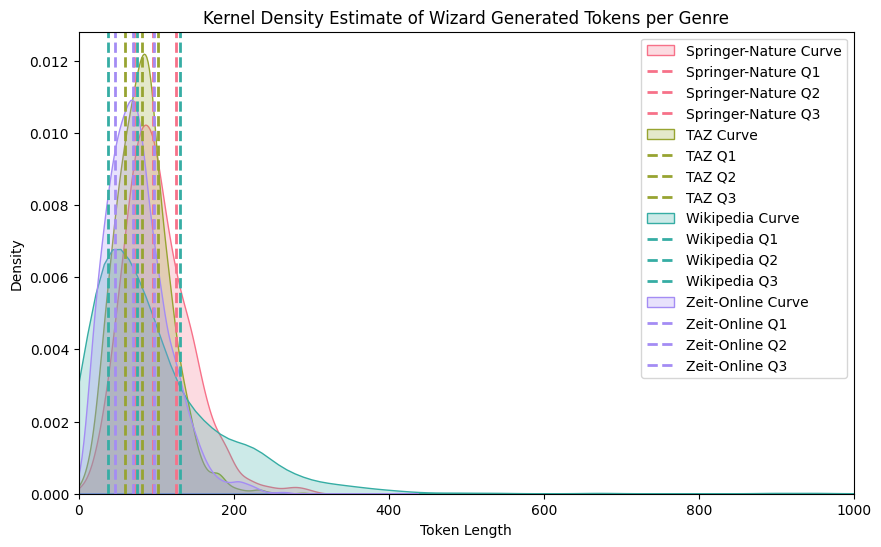

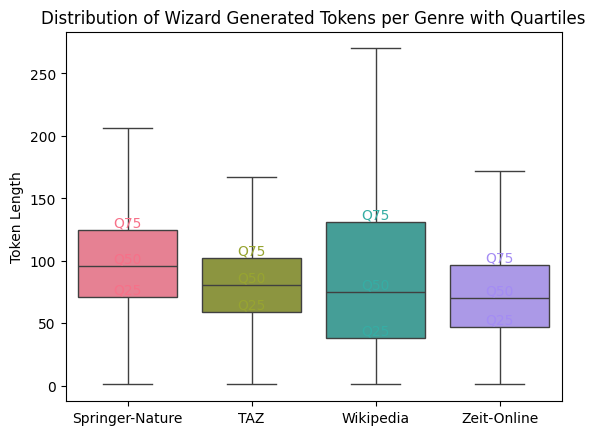

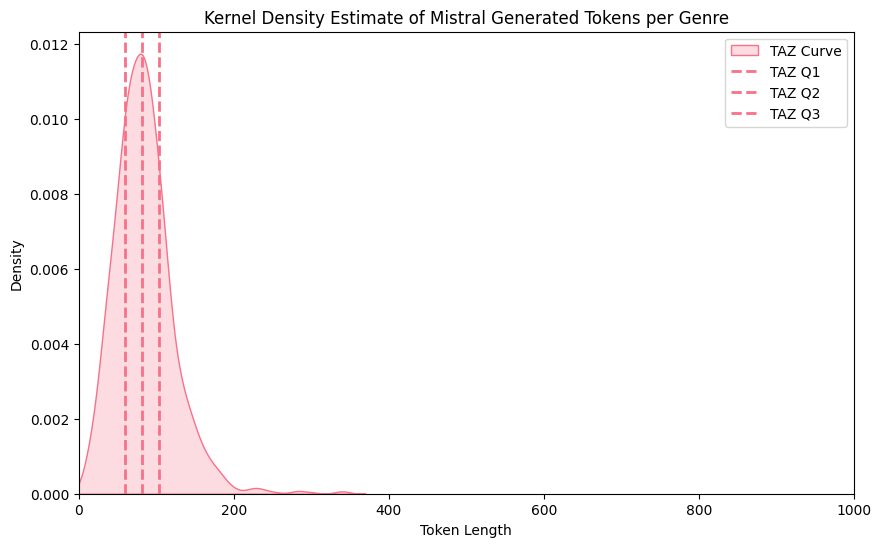

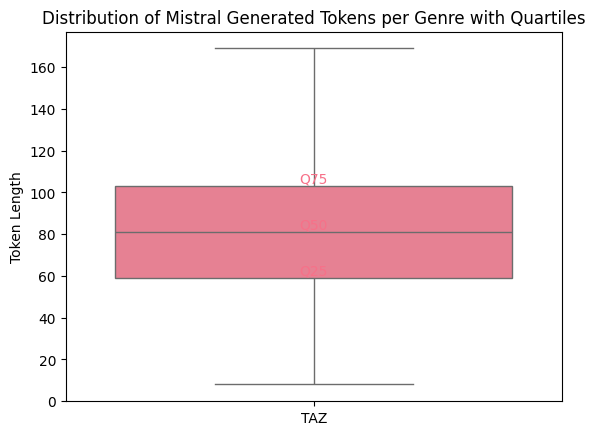

In [10]:
plot_data(token_lens_dict_mg_mixed,"snoozy", "Snoozy")
plot_data(token_lens_dict_mg_mixed,"gpt", "GPT")
plot_data(token_lens_dict_mg_mixed,"wizard", "Wizard")
plot_data(token_lens_dict_mg_mixed,"mistral", "Mistral")
#plot_data(token_lens_dict_mg_test_only,"test", "Mistral & GPT")
    
    